# Árvores de decisão

## Importando as libs

In [1]:
import numpy as np
import pandas as pd
import pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

## Base de dados risco credito - Exemplo didático

### Importando a base de dados

In [2]:
with open('./data/risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [3]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [4]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

### Analise dos dados

In [5]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

### Predições testes

In [6]:
arvore_risco_credito.feature_importances_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

In [7]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

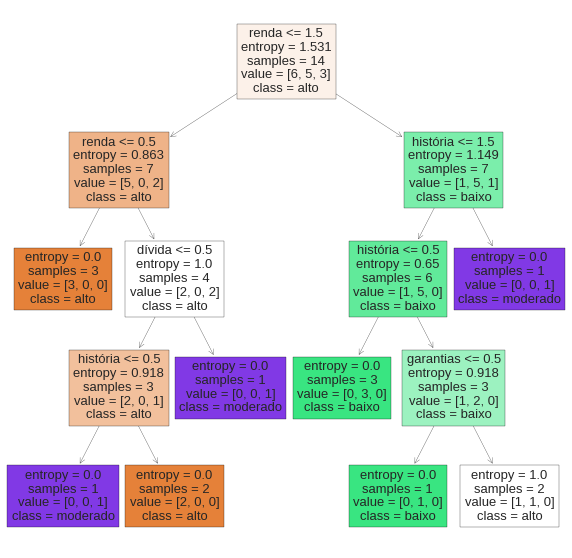

In [8]:
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, 
               feature_names=['história', 'dívida', 'garantias', 'renda'], 
               class_names = arvore_risco_credito.classes_, 
               filled=True);

In [9]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsao = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsao

array(['baixo', 'alto'], dtype=object)

In [10]:
del X_risco_credito, y_risco_credito
del arvore_risco_credito, previsao

## Base credit data - Resultado da análise: 98.2%

### Importando a base de dados

In [11]:
with open('./data/credit.pkl', 'rb') as f:  
    X_train_credit, y_train_credit, X_test_credit, y_test_credit = pickle.load(f)

In [12]:
X_train_credit.shape, y_train_credit.shape

((1500, 3), (1500,))

In [13]:
X_test_credit.shape, y_test_credit.shape

((500, 3), (500,))

### Experimentando o modelo

In [14]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_credit.fit(X_train_credit, y_train_credit)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
y_pred = arvore_credit.predict(X_test_credit)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [16]:
y_test_credit

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Análise dos resultados

In [17]:
accuracy_score(y_test_credit, y_pred)

0.982

0.982

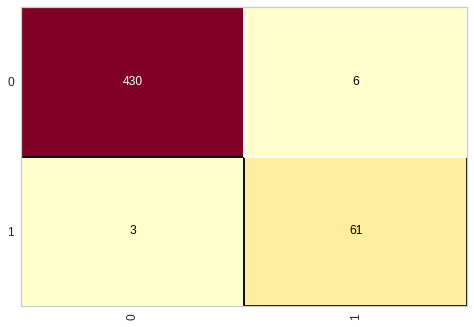

In [18]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_train_credit, y_train_credit)
cm.score(X_test_credit, y_test_credit)

In [19]:
print(classification_report(y_test_credit, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [20]:
arvore_credit.classes_

array([0, 1])

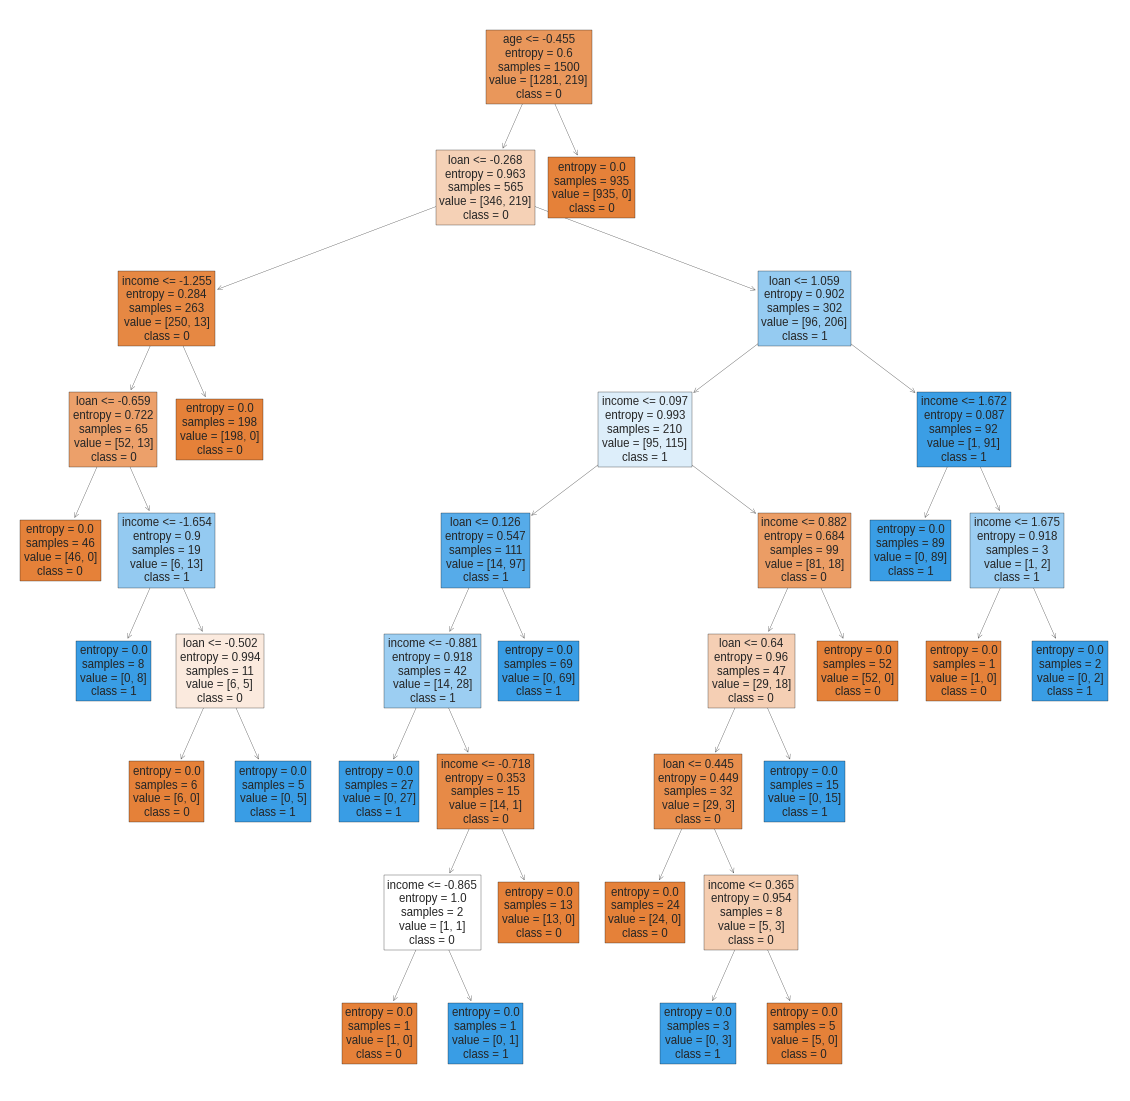

In [21]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_credit, 
               feature_names=['income', 'age', 'loan'], 
               class_names=['0','1'], 
               filled=True);
# fig.savefig('arvore_credit.png')

In [22]:
del X_train_credit, y_train_credit, X_test_credit, y_test_credit
del arvore_credit, y_pred, cm

## Base census data - Resultado da análise: 81.7%

### Importando a base de dados

In [23]:
with open('./data/census.pkl', 'rb') as f:  
    X_train_census, y_train_census, X_test_census, y_test_census = pickle.load(f)

In [24]:
X_train_census.shape, y_train_census.shape

((24420, 108), (24420,))

In [25]:
X_test_census.shape, y_test_census.shape

((8141, 108), (8141,))

### Experimentando o modelo

In [26]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_train_census, y_train_census)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
y_pred = arvore_census.predict(X_test_census)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [28]:
y_test_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

### Análise dos resultados

In [29]:
accuracy_score(y_test_census, y_pred)

0.8168529664660361

0.8168529664660361

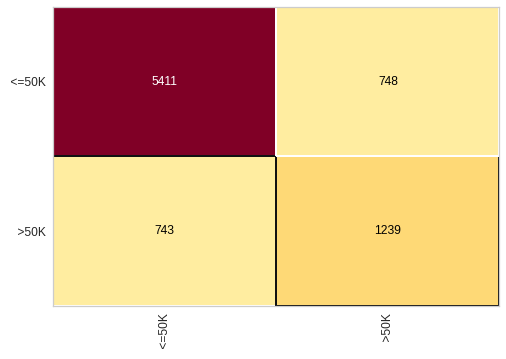

In [30]:
cm = ConfusionMatrix(arvore_census)
cm.fit(X_train_census, y_train_census)
cm.score(X_test_census, y_test_census)

In [31]:
print(classification_report(y_test_census, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      6159
        >50K       0.62      0.63      0.62      1982

    accuracy                           0.82      8141
   macro avg       0.75      0.75      0.75      8141
weighted avg       0.82      0.82      0.82      8141



In [32]:
del X_train_census, y_train_census, X_test_census, y_test_census
del arvore_census, y_pred, cm